<a href="https://colab.research.google.com/github/Mehranwaheed/MSC_Group_Project/blob/main/new_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from PIL import Image
import joblib

def read_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            # Convert image to grayscale and resize
            img = img.convert('L').resize((224, 224))
            # Convert image to NumPy array
            img_array = np.array(img)
            # Normalize pixel values to range [0, 1]
            img_array = img_array / 255.0
            images.append(img_array)
            labels.append(label)
    return images, labels

# Path to the folders containing anomaly and normal images
train_anomaly_folder = "/content/drive/MyDrive/MSC_Group_Project/training_anomaly"
train_normal_folder = "/content/drive/MyDrive/MSC_Group_Project/training_normal"

# Read anomaly images
X_train_anomaly_images, y_train_anomaly_labels = read_images(train_anomaly_folder, label=1)
print("Anomaly images read successfully.")

# Read normal images
X_train_normal_images, y_train_normal_labels = read_images(train_normal_folder, label=0)
print("Normal images read successfully.")

# Concatenate anomaly and normal images and labels
#X = np.concatenate([anomaly_features, normal_features], axis=0)
X_train = X_train_normal_images + X_train_anomaly_images
y_train = y_train_anomaly_labels + y_train_normal_labels


#X = np.concatenate([anomaly_images, normal_images], axis=0)
#y = np.concatenate([anomaly_labels, normal_labels])

#print("X shape:", X.shape)
#print("y shape:", y.shape)


Anomaly images read successfully.
Normal images read successfully.


In [ ]:
import os
import numpy as np
from PIL import Image
import joblib

def read_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            # Convert image to grayscale and resize
            img = img.convert('L').resize((224, 224))
            # Convert image to NumPy array
            img_array = np.array(img)
            # Normalize pixel values to range [0, 1]
            img_array = img_array / 255.0
            images.append(img_array)
            labels.append(label)
    return images, labels

# Path to the folders containing anomaly and normal images
test_anomaly_folder = "/content/drive/MyDrive/MSC_Group_Project/test_anomaly"
test_normal_folder = "/content/drive/MyDrive/MSC_Group_Project/test_normal"

# Read anomaly images
X_test_anomaly_images, y_test_anomaly_labels = read_images(train_anomaly_folder, label=1)
print("Anomaly images read successfully.")

# Read normal images
X_test_normal_images, y_test_normal_labels = read_images(train_normal_folder, label=0)
print("Normal images read successfully.")

# Concatenate anomaly and normal images and labels
#X = np.concatenate([anomaly_features, normal_features], axis=0)
X_test = X_test_anomaly_images + X_test_normal_images
y_test = y_test_anomaly_labels + y_test_normal_labels


#X = np.concatenate([anomaly_images, normal_images], axis=0)
#y = np.concatenate([anomaly_labels, normal_labels])

#print("X shape:", X.shape)
#print("y shape:", y.shape)


Anomaly images read successfully.
Normal images read successfully.


# PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
X_train=np.array(X_train)
X_test=np.array(X_test)
X_train_re = X_train.reshape(X_train.shape[0], -1)
X_test_re = X_test.reshape(X_test.shape[0], -1)

n_components = 100
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train_re)
X_test_pca = pca.transform(X_test_re)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_pca)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.62%


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.01      0.01      0.01        80

    accuracy                           0.01       160
   macro avg       0.01      0.01      0.01       160
weighted avg       0.01      0.01      0.01       160



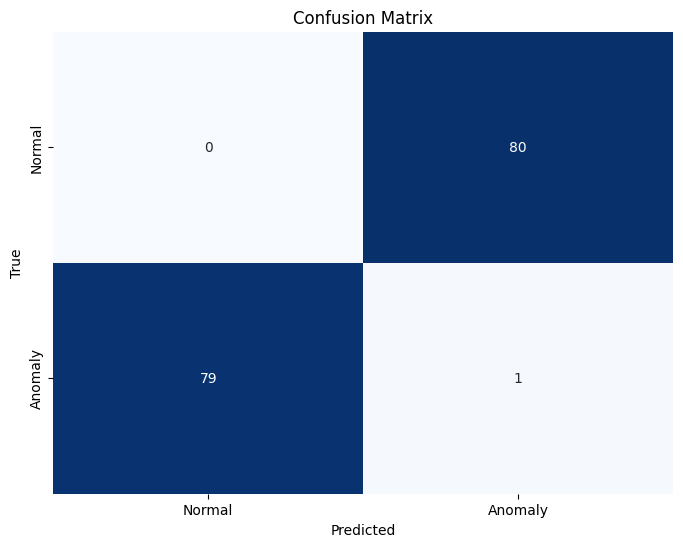

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Normal', 'Anomaly']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Resnet50

In [ ]:
import os
import shutil
import random
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image


# Load pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)
model.eval()

# Preprocess input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit ResNet input size
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Function to extract features and labels
def extract_features_and_labels(folder_path, label):
    images = os.listdir(folder_path)
    features = []
    labels = []

    for image_name in images:
        input_image_path = os.path.join(folder_path, image_name)

        input_image = Image.open(input_image_path)
        input_tensor = transform(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            features_tensor = model(input_batch)
        feature_vector = features_tensor.squeeze().numpy()
        features.append(feature_vector)
        labels.append(label)
    return features, labels

# Path to training folders
train_normal_folder = "/content/drive/MyDrive/MSC_Group_Project/training_normal"
train_anomaly_folder = "/content/drive/MyDrive/MSC_Group_Project/training_anomaly"

# Extract features and labels for normal images
X_train_normal, y_train_normal = extract_features_and_labels(train_normal_folder, label=0)

# Extract features and labels for anomaly images
X_train_anomaly, y_train_anomaly = extract_features_and_labels(train_anomaly_folder, label=1)

# Combine normal and anomaly features and labels
X_train = X_train_normal + X_train_anomaly
y_train = y_train_normal + y_train_anomaly


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import os
import shutil
import random
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image


# Load pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)
model.eval()

# Preprocess input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit ResNet input size
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Function to extract features and labels
def extract_features_and_labels(folder_path, label):
    images = os.listdir(folder_path)
    features = []
    labels = []

    for image_name in images:
        input_image_path = os.path.join(folder_path, image_name)

        input_image = Image.open(input_image_path)
        input_tensor = transform(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            features_tensor = model(input_batch)
        feature_vector = features_tensor.squeeze().numpy()
        features.append(feature_vector)
        labels.append(label)
    return features, labels

# Path to training folders
test_normal_folder = "/content/drive/MyDrive/MSC_Group_Project/test_normal"
test_anomaly_folder = "/content/drive/MyDrive/MSC_Group_Project/test_anomaly"

# Extract features and labels for normal images
X_test_normal, y_test_normal = extract_features_and_labels(test_normal_folder, label=0)

# Extract features and labels for anomaly images
X_test_anomaly, y_test_anomaly = extract_features_and_labels(test_anomaly_folder, label=1)

# Combine normal and anomaly features and labels
X_test = X_test_normal + X_test_anomaly
y_test = y_test_normal + y_test_anomaly


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
#joblib.dump(svm_classifier,"/content/drive/MyDrive/MSC_Group_Project/model/svm_model1.pkl")

Accuracy: 77.50%


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        20
           1       0.87      0.65      0.74        20

    accuracy                           0.78        40
   macro avg       0.79      0.78      0.77        40
weighted avg       0.79      0.78      0.77        40



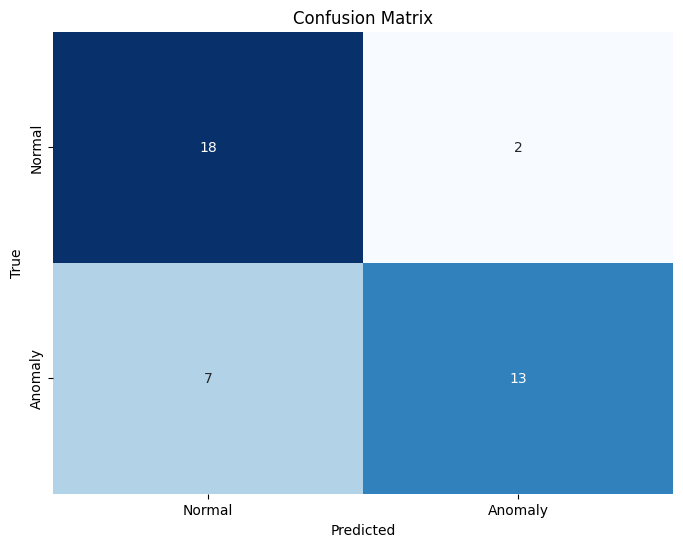

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Normal', 'Anomaly']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
y_proba = svm_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_resnet, tpr_resnet, _ = roc_curve(y_test, y_proba)
roc_auc_resnet = auc(fpr_resnet, tpr_resnet)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Combine features for normal and anomaly images in the test set
X_test = np.concatenate((X_test_normal, X_test_anomaly), axis=0)

# Predict labels for the combined test set
y_pred_test = svm_classifier.predict(X_test)

# True labels for the test set
y_true_test = [0]*len(X_test_normal) + [1]*len(X_test_anomaly)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_true_test, y_pred_test)
print("Accuracy on test set:", accuracy)

# Identify misclassified images
misclassified_normal = [image_name for image_name, pred_label in zip(os.listdir(test_normal_folder), y_pred_test[:len(X_test_normal)]) if pred_label == 1]
misclassified_anomaly = [image_name for image_name, pred_label in zip(os.listdir(test_anomaly_folder), y_pred_test[len(X_test_normal):]) if pred_label == 0]

print("Misclassified normal images:", misclassified_normal)
print("Misclassified anomaly images:", misclassified_anomaly)


Accuracy on test set: 0.775
Misclassified normal images: ['Normal_93.jpg', 'Normal_99.jpg']
Misclassified anomaly images: ['Anomaly_81.jpg', 'Anomaly_82.jpg', 'Anomaly_87.jpg', 'Anomaly_90.jpg', 'Anomaly_91.jpg', 'Anomaly_92.jpg', 'Anomaly_98.jpg']


# VGG 16

In [ ]:
import os
import shutil
import random
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image


# Load pre-trained ResNet-50 model
model = models.vgg16(pretrained=True)
model.eval()

# Preprocess input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit ResNet input size
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Function to extract features and labels
def extract_features_and_labels(folder_path, label):
    images = os.listdir(folder_path)
    features = []
    labels = []

    for image_name in images:
        input_image_path = os.path.join(folder_path, image_name)

        input_image = Image.open(input_image_path)
        input_tensor = transform(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            features_tensor = model(input_batch)
        feature_vector = features_tensor.squeeze().numpy()
        features.append(feature_vector)
        labels.append(label)
    return features, labels

# Path to training folders
train_normal_folder = "/content/drive/MyDrive/MSC_Group_Project/training_normal"
train_anomaly_folder = "/content/drive/MyDrive/MSC_Group_Project/training_anomaly"

# Extract features and labels for normal images
X_train_normal, y_train_normal = extract_features_and_labels(train_normal_folder, label=0)

# Extract features and labels for anomaly images
X_train_anomaly, y_train_anomaly = extract_features_and_labels(train_anomaly_folder, label=1)

# Combine normal and anomaly features and labels
X_train = X_train_normal + X_train_anomaly
y_train = y_train_normal + y_train_anomaly


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 83.7MB/s]


In [ ]:
import os
import shutil
import random
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image


# Load pre-trained ResNet-50 model
model = models.vgg16(pretrained=True)
model.eval()

# Preprocess input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit ResNet input size
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Function to extract features and labels
def extract_features_and_labels(folder_path, label):
    images = os.listdir(folder_path)
    features = []
    labels = []

    for image_name in images:
        input_image_path = os.path.join(folder_path, image_name)

        input_image = Image.open(input_image_path)
        input_tensor = transform(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            features_tensor = model(input_batch)
        feature_vector = features_tensor.squeeze().numpy()
        features.append(feature_vector)
        labels.append(label)
    return features, labels

# Path to training folders
test_normal_folder = "/content/drive/MyDrive/MSC_Group_Project/test_normal"
test_anomaly_folder = "/content/drive/MyDrive/MSC_Group_Project/test_anomaly"

# Extract features and labels for normal images
X_test_normal, y_test_normal = extract_features_and_labels(test_normal_folder, label=0)

# Extract features and labels for anomaly images
X_test_anomaly, y_test_anomaly = extract_features_and_labels(test_anomaly_folder, label=1)

# Combine normal and anomaly features and labels
X_test = X_test_normal + X_test_anomaly
y_test = y_test_normal + y_test_anomaly


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
#joblib.dump(svm_classifier,"/content/drive/MyDrive/MSC_Group_Project/model/vgg16_model2.pkl")

Accuracy: 85.00%


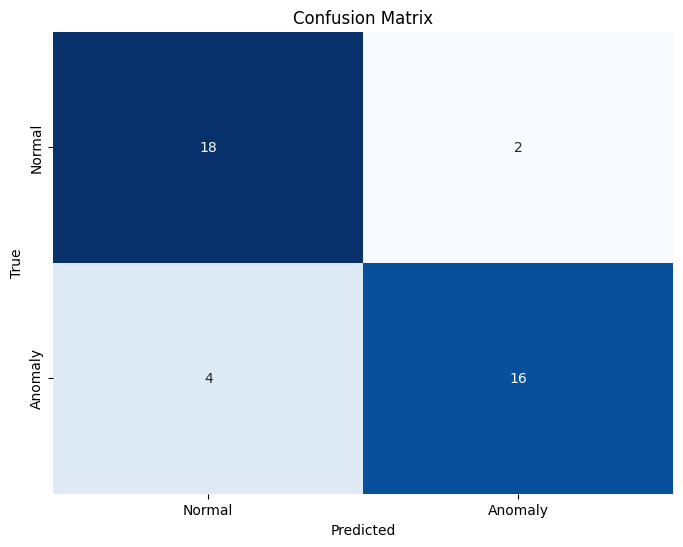

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Normal', 'Anomaly']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Combine features for normal and anomaly images in the test set
X_test = np.concatenate((X_test_normal, X_test_anomaly), axis=0)

# Predict labels for the combined test set
y_pred_test = svm_classifier.predict(X_test)

# True labels for the test set
y_true_test = [0]*len(X_test_normal) + [1]*len(X_test_anomaly)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_true_test, y_pred_test)
print("Accuracy on test set:", accuracy)

# Identify misclassified images
misclassified_normal = [image_name for image_name, pred_label in zip(os.listdir(test_normal_folder), y_pred_test[:len(X_test_normal)]) if pred_label == 1]
misclassified_anomaly = [image_name for image_name, pred_label in zip(os.listdir(test_anomaly_folder), y_pred_test[len(X_test_normal):]) if pred_label == 0]

print("Misclassified normal images:", misclassified_normal)
print("Misclassified anomaly images:", misclassified_anomaly)


Accuracy on test set: 0.85
Misclassified normal images: ['Normal_87.jpg', 'Normal_98.jpg']
Misclassified anomaly images: ['Anomaly_90.jpg', 'Anomaly_92.jpg', 'Anomaly_97.jpg', 'Anomaly_98.jpg']


In [ ]:
from sklearn.metrics import roc_curve, auc
y_proba = svm_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_vgg16_1, tpr_vgg16_1, _ = roc_curve(y_test, y_proba)
roc_auc_simple = auc(fpr_vgg16_1, tpr_vgg16_1)

# hyper parameter Tuning of SVM after extracting features with VGG16

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.01, 0.1, 1, 'scale']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best Score: 0.9125
Test Score: 0.9


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True,C=1,gamma=0.01,kernel="linear")
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
#joblib.dump(svm_classifier,"/content/drive/MyDrive/MSC_Group_Project/model/vgg16_model_3.pkl")

Accuracy: 90.00%


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.90      0.90      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [ ]:
from sklearn.metrics import roc_curve, auc
y_proba = svm_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_vgg16_2, tpr_vgg16_2, _ = roc_curve(y_test, y_proba)
roc_auc_hp = auc(fpr_vgg16_2, tpr_vgg16_2)

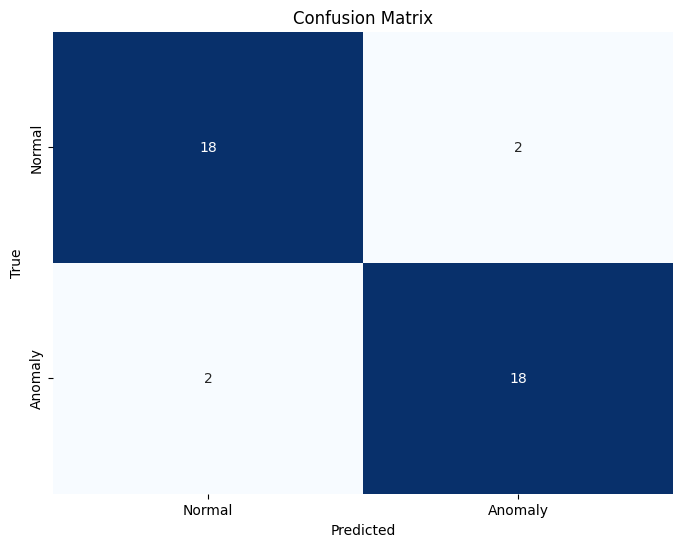

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Normal', 'Anomaly']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Combine features for normal and anomaly images in the test set
X_test = np.concatenate((X_test_normal, X_test_anomaly), axis=0)

# Predict labels for the combined test set
y_pred_test = svm_classifier.predict(X_test)

# True labels for the test set
y_true_test = [0]*len(X_test_normal) + [1]*len(X_test_anomaly)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_true_test, y_pred_test)
print("Accuracy on test set:", accuracy)

# Identify misclassified images
misclassified_normal = [image_name for image_name, pred_label in zip(os.listdir(test_normal_folder), y_pred_test[:len(X_test_normal)]) if pred_label == 1]
misclassified_anomaly = [image_name for image_name, pred_label in zip(os.listdir(test_anomaly_folder), y_pred_test[len(X_test_normal):]) if pred_label == 0]

print("Misclassified normal images:", misclassified_normal)
print("Misclassified anomaly images:", misclassified_anomaly)


Accuracy on test set: 0.9
Misclassified normal images: ['Normal_95.jpg', 'Normal_98.jpg']
Misclassified anomaly images: ['Anomaly_97.jpg', 'Anomaly_98.jpg']


# ROC/AUC Curve

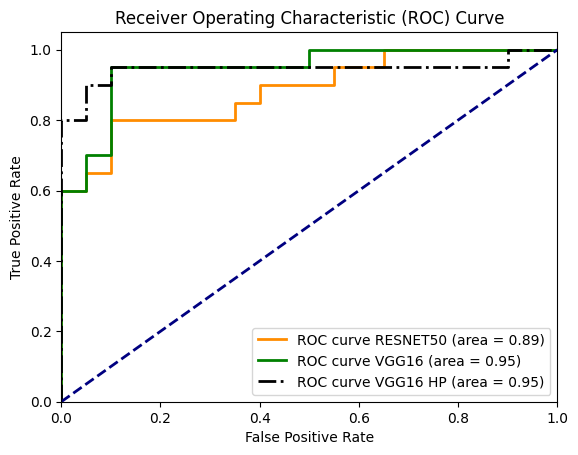

In [ ]:

plt.figure()
plt.plot(fpr_resnet, tpr_resnet, color='darkorange', lw=2, label='ROC curve RESNET50 (area = %0.2f)' % roc_auc_resnet)
plt.plot(fpr_vgg16_1, tpr_vgg16_1, color='green', lw=2, label='ROC curve VGG16 (area = %0.2f)' % roc_auc_simple)
plt.plot(fpr_vgg16_2, tpr_vgg16_2, color='black', lw=2, label='ROC curve VGG16 HP (area = %0.2f)' % roc_auc_hp,linestyle="dashdot")
#plt.plot(fpr_hp, tpr_hp, color='red', lw=2, label='ROC curve after tuning SVM (area = %0.2f)' % roc_auc_hp,linestyle="dashdot")


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()